# Recursive definition of fractals and Python realization

Fractals are geometric objects that can be described in different ways. The following is a way based on a recurrent formula and the concept of polyline.

# Rotation

**Definition** (Closed line segment). In $V\subseteq\mathbb{R}^2$, a closed line segment $L(\mathbf{u},\mathbf{v})\subset V$ is defined as
\begin{equation}
L(\mathbf{u},\mathbf{v})=\{t\mathbf{u}+(1-t)\mathbf{v}| \mathbf{u},\mathbf{v}\in V, t\in[0,1]\}
\end{equation}
and it is fully characterized by the knowledge of $\mathbf{u}$ and $\mathbf{v}$.

**Definition** (Rotation). To perform a counterclockwise rotation of a column vector $\mathbf{v}\in\mathbb{R}^2$ through $\theta$ radiants w.r.t. the $x$ axis, the vector should be multiplied by the matrix $R(\theta)$:
\begin{equation}
R(\theta)=\begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta
\end{bmatrix}
\end{equation}
so the vector $\mathbf{v}=[x, y]^T$ becomes
\begin{equation}
R(\theta)\mathbf{v}=\begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta
\end{bmatrix}\begin{bmatrix}x\\ y
\end{bmatrix}=\begin{bmatrix}x\cos\theta -y\sin\theta \\ x\sin\theta +y\cos\theta
\end{bmatrix}
\end{equation}

To perform an analogue rotation for a segment $L(\mathbf{u},\mathbf{v})$, fixing $\mathbf{u}$, it is necessary to translate the origin of the coordinate system. For example, let us rotate a segment defined by $\mathbf{u}=[1, 1]$ and $\mathbf{v}=[2, 2]$ to obtain the segment defined by $\mathbf{u}=[1, 1]$ and $\mathbf{v}^R=[1, 1+\sqrt{2}]$. Firstly we have to translate the vectors, subtracting the $\mathbf{u}$ coordinates: we obtain $\mathbf{u}'=[0, 0]$ and $\mathbf{v}'=[1, 1]$. Now we can use $R(\pi/4)$:
\begin{equation}
R(\pi/4)\mathbf{v}'=\begin{bmatrix}\cos\pi/4 -\sin\pi/4 \\ \sin\pi/4 +\cos\pi/4
\end{bmatrix}=\begin{bmatrix}0 \\ \sqrt{2}
\end{bmatrix}
\end{equation}
and finally return to $\mathbf{u}=[1, 1]$, $\mathbf{v}^R=[1, 1+\sqrt{2}]=R(\pi/4)\mathbf{v}'+\mathbf{u}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def rotationMatrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def to_origin(a, b):
    return np.array([b[0]-a[0], b[1]-a[1]])

def to_a(c, a):
    return np.array([c[0]+a[0], c[1]+a[1]])

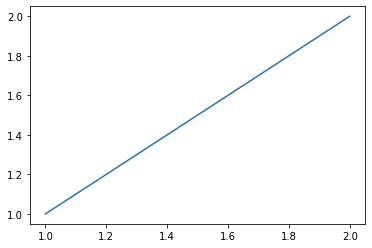

In [4]:
u = np.array([1, 1])
v = np.array([2, 2])
plt.plot([u[0], v[0]], [u[1], v[1]])
plt.show()

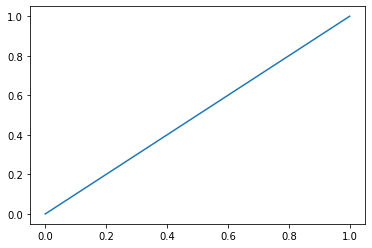

In [5]:
u_1 = to_origin(u, u)
v_1 = to_origin(u, v)
plt.plot([u_1[0], v_1[0]], [u_1[1], v_1[1]])
plt.show()

[0.         1.41421356]


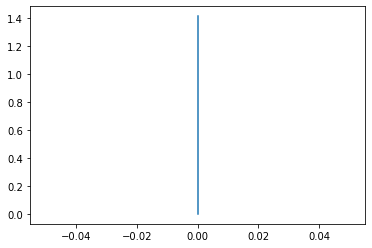

In [6]:
v_1_R = np.inner(rotationMatrix(np.pi/4), v_1)
print(v_1_R)
plt.plot([u_1[0], v_1_R[0]], [u_1[1], v_1_R[1]])
plt.show()

[1 1]
[1.         2.41421356]


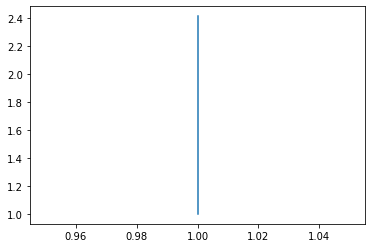

In [7]:
v_R = to_a(v_1_R, u)
print(u)
print(v_R)
plt.plot([u[0], v_R[0]], [u[1], v_R[1]])
plt.show()

# Scaling

To rescale a $L(\mathbf{u}, \mathbf{v})$ segment we can replace $\mathbf{v}$ with an other point $\mathbf{w}\in L(\mathbf{u}, \mathbf{v})$ given by a convex combination of $\mathbf{u}$ and $\mathbf{v}$ (note that $L(\mathbf{u},\mathbf{v})$ is the set of all results of the convex cominations between $\mathbf{u}$ and $\mathbf{v}$).

In [8]:
def convex_comb(a, b, lamb): # lambda must be in [0,1]
    return np.array([lamb*a[0]+(1-lamb)*b[0], lamb*a[1]+(1-lamb)*b[1]])

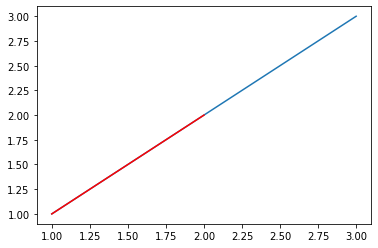

In [10]:
u = np.array([1, 1])
v = np.array([3, 3])
plt.plot([u[0], v[0]], [u[1], v[1]])
coeff = 0.5
v_1 = convex_comb(u, v, coeff)
plt.plot([u[0], v_1[0]], [u[1], v_1[1]], color='red')
plt.show()

# The $f$ transformation

Let $f_{\theta, \lambda}(\mathbf{u}, \mathbf{v})$ be a transformation that performs (in order):

1. the convex combination with $\lambda\in[0,1]$ coefficient;

2. the rotation fixing $\mathbf{u}$ with $R(\theta)$.

In [13]:
def change_dir(a, b, theta):
    return to_a(np.inner(rotationMatrix(theta), to_origin(a, b)), a)

For example, let's compute the $f_{-\frac{\pi}{4}, \frac{1}{4}}([1,1],[1,4])$ transformation:

[ 2.59099026 -0.59099026]


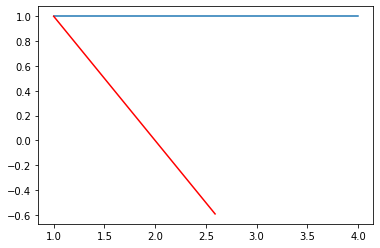

In [21]:
a = np.array([1, 1])
b = np.array([4, 1])
plt.plot([a[0], b[0]], [a[1], b[1]])
c = change_dir(a, convex_comb(a, b, 1/4), -np.pi/4)
plt.plot([a[0], c[0]], [a[1], c[1]], color='red')
print(c)
plt.show()

so $f_{-\frac{\pi}{4}, \frac{1}{4}}([1,1],[1,4])\approx [2.6, -0.6]$ so it induces the segment $\approx L([1,1],[2.6,-0.6])$.

# Polyline

**Definition** (Polyline). Given $n\in\mathbb{N}$, $\vec\theta=[\theta_1,\dots,\theta_n]$, $\vec\lambda=[\lambda_1,\dots, \lambda_n]$, the polyline
\begin{equation}
P_{\vec\theta,\vec\lambda}(\mathbf{u},\mathbf{v})=\big(\mathbf{u}, f_{\theta_1, \lambda_1}(\mathbf{u}, \mathbf{v}),\dots, f_{\theta_n, \lambda_n}(\mathbf{u}, \mathbf{v}), \mathbf{v}\big)=(\mathbf{u}, \mathbf{p}_1, \mathbf{p}_2,\dots,\mathbf{p}_n,\mathbf{v})
\end{equation}
is the sequence of consecutive segments $L(\mathbf{u}, \mathbf{p}_1)$, $L(\mathbf{p}_1, \mathbf{p}_2)$ etc.

In [15]:
def polyline(a, b, lambdas, thetas):
    n = len(lambdas)
    x_ax = []
    y_ax = []
    for i in range(n):
        c = change_dir(a, convex_comb(a, b, lambdas[i]), thetas[i])
        x_ax.append(c[0])
        y_ax.append(c[1])
    return [x_ax, y_ax]

In [16]:
def to_plot(a, b, p):
    x_ax = [a[0]]
    y_ax = [a[1]]
    p_x = p[0]
    p_y = p[1]
    for i in range(len(p_x)):
        x_ax.append(p_x[i])
        y_ax.append(p_y[i])
    x_ax.append(b[0])
    y_ax.append(b[1])
    return [x_ax, y_ax]

# Fractal

**Definition** (Fractal). Given a $k\in\mathbb{N}$ and a polyline $P_{\vec\theta,\vec\lambda}(\mathbf{u},\mathbf{v})=(\mathbf{u}, \mathbf{p}_1, \mathbf{p}_2,\dots,\mathbf{p}_n,\mathbf{v})$, a fractal of depth $k$ is 
\begin{equation}
F_{\vec\theta,\vec\lambda, k}(\mathbf{u},\mathbf{v})=\begin{cases}
(\mathbf{u}, \mathbf{p}_1, \mathbf{p}_2,\dots,\mathbf{p}_n,\mathbf{v}) & \text{ if } k=1\\
\big(F_{\vec\theta,\vec\lambda, k-1}(\mathbf{u},\mathbf{p}_1),\dots, F_{\vec\theta,\vec\lambda, k-1}(\mathbf{p}_n,\mathbf{v})\big) & \text{ if } k\geq 2
\end{cases}
\end{equation}
and it can be computed as follows.

In [17]:
def k_frac(a, b, lambdas, thetas, k):
    p = polyline(a, b, lambdas, thetas)
    if k == 1:
        return p
    px = p[0]
    py = p[1]
    first = [px[0], py[0]]
    q = k_frac(a, first, lambdas, thetas, k-1)
    x_ax = q[0]
    y_ax = q[1]
    for i in range(len(px)-1):
        x_ax.append(px[i])
        y_ax.append(py[i])
        c_i = [px[i], py[i]]
        c_i1 = [px[i+1], py[i+1]]
        q = k_frac(c_i, c_i1, lambdas, thetas, k-1)
        x_ax = x_ax + q[0]
        y_ax = y_ax + q[1]
    x_ax.append(px[len(px)-1])
    y_ax.append(py[len(px)-1])
    last = [px[len(px)-1], py[len(py)-1]]
    q = k_frac(last, b, lambdas, thetas, k-1)
    x_ax = x_ax + q[0]
    y_ax = y_ax + q[1]
    return [x_ax, y_ax]

# Some examples

In [18]:
a = [0, 0]
b = [6, 0]

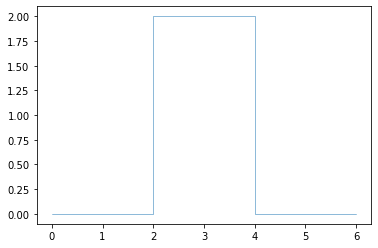

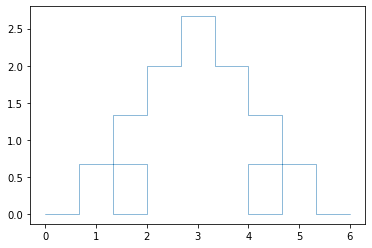

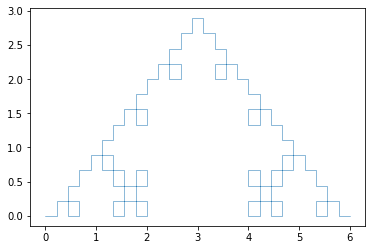

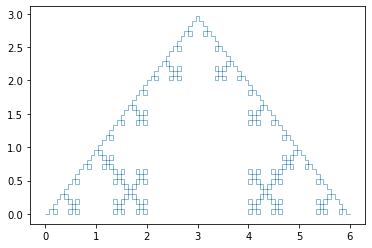

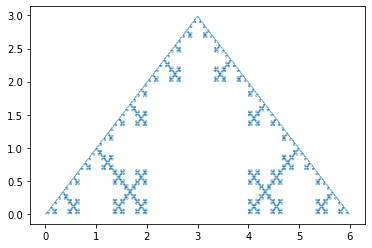

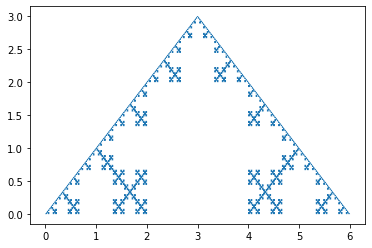

In [19]:
k = 7
lambdas = [2/3, 1-math.sqrt(2)/3, 1-math.sqrt(5)/3, 1/3]
thetas = [0, np.pi/4, 0.463647609, 0]

for i in range(1, k):
    p = k_frac(a, b, lambdas, thetas, i)
    q = to_plot(a, b, p)
    plt.plot(q[0], q[1], linewidth=.5)
    plt.show()

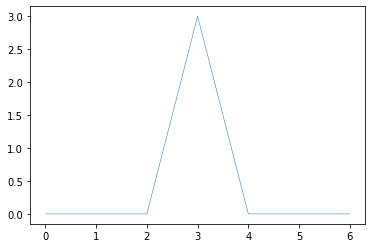

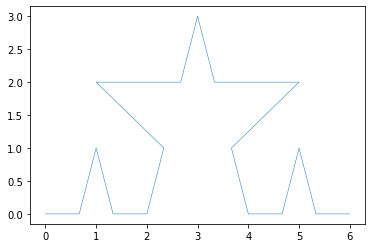

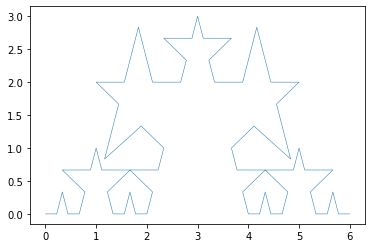

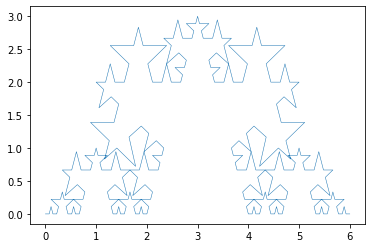

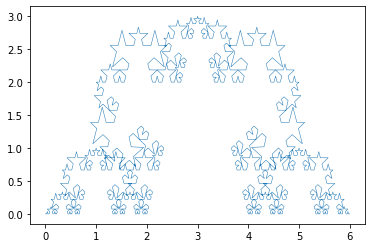

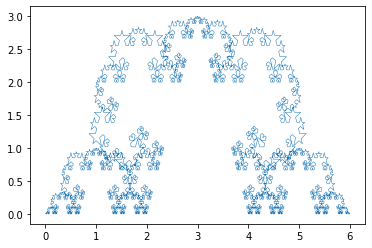

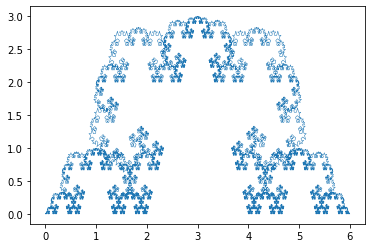

In [20]:
k = 8
lambdas = [2/3, 1-math.sqrt(2)/2, 1/3]
thetas = [0, np.pi/4, 0]

for i in range(1, k):
    p = k_frac(a, b, lambdas, thetas, i)
    q = to_plot(a, b, p)
    plt.plot(q[0], q[1], linewidth=.5)
    plt.show()